In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
#2）内嵌绘图忽略plt.show()--------%matplotlib inline
#3)数据清洗三大块：缺失值，异常值，分类变量



In [2]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df_train = pd.read_csv('C:/Users/Administrator/Desktop/picked_cal2.csv')
df_train.columns
#df_train=df_train[df_train['STATA']=='S1K3']

Index(['Well', 'Depth', 'Pore', 'GR', 'SP', 'CAL', 'K', 'TH', 'U', 'DEN', 'AC',
       'CN', 'PERM', 'STA', 'Lithcore', 'Lithdebris', 'Faces'],
      dtype='object')

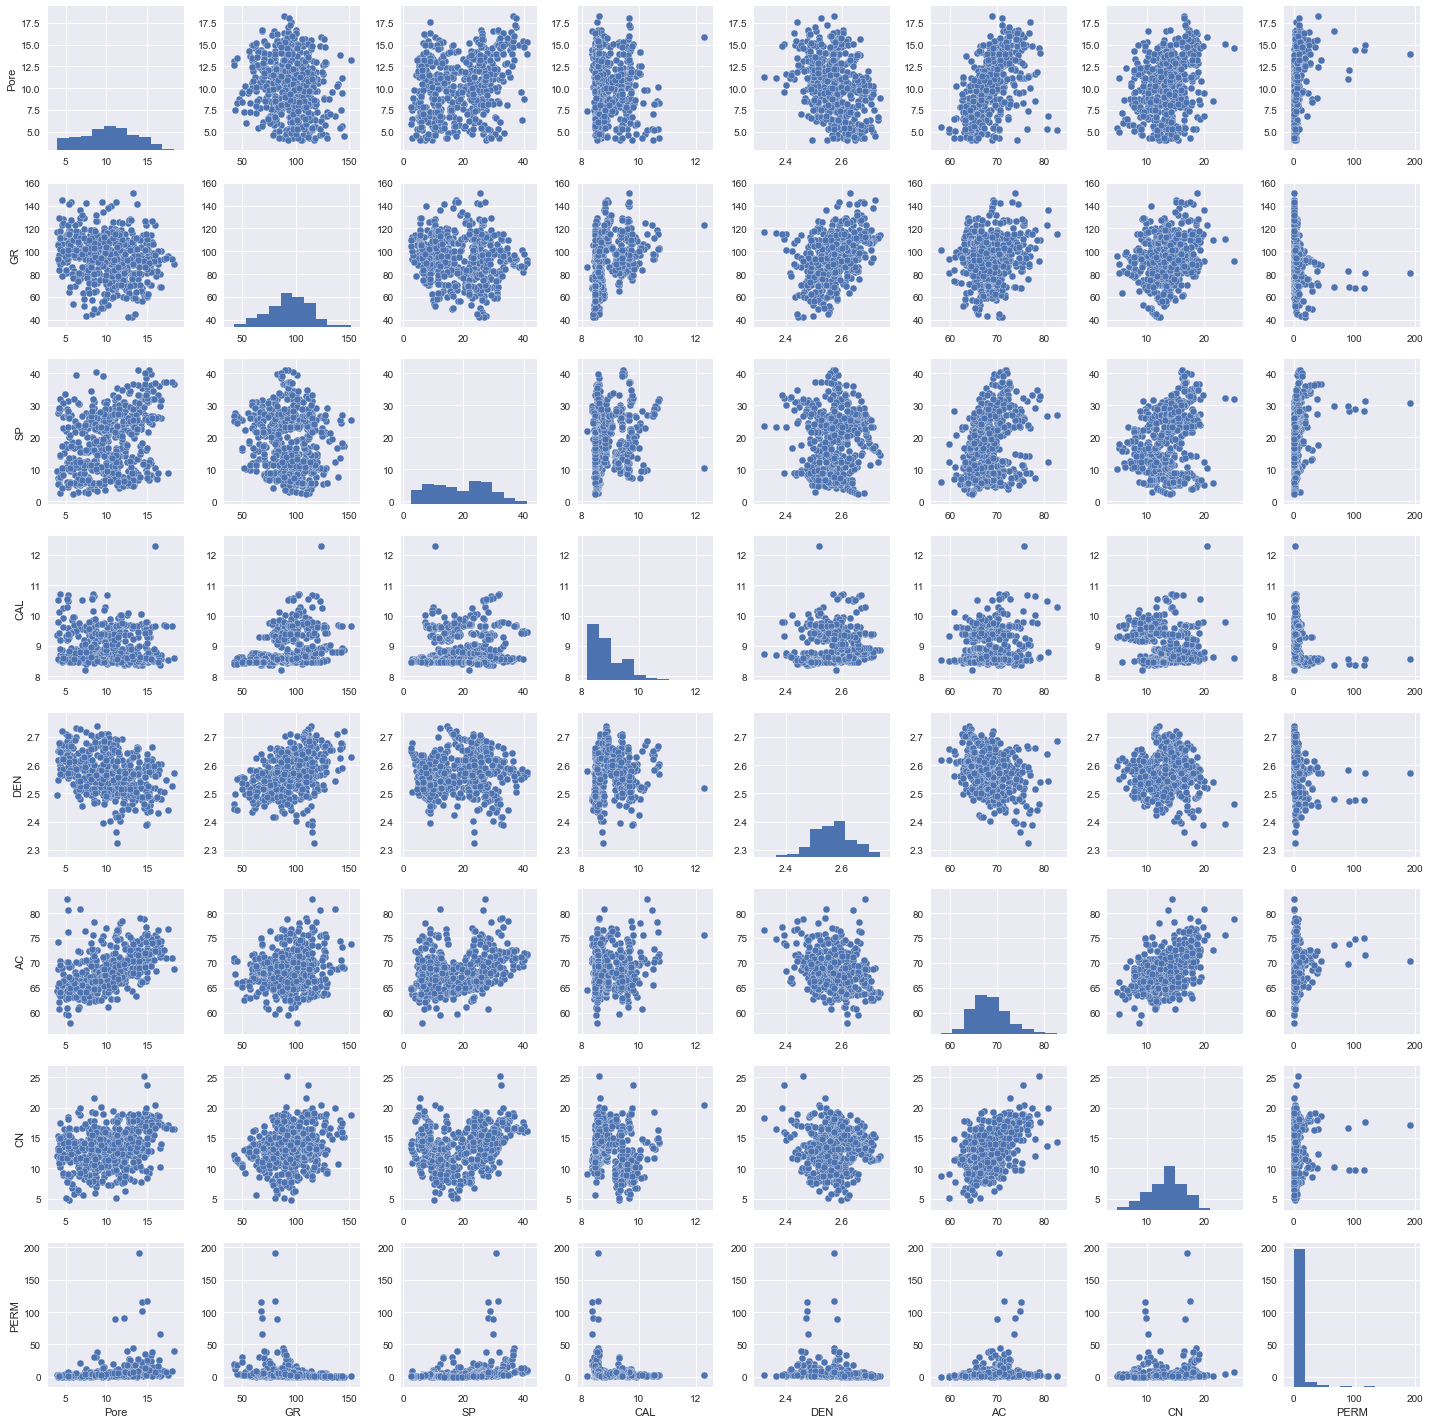

In [4]:
#df_train['k']=np.log(df_train['k'])
sns.set()
#cols = ['PORE','U','DEN', 'AC', 'CN']
cols = [ 'Pore', 'GR', 'SP', 'CAL', 'DEN', 'AC',
       'CN', 'PERM']
sns.pairplot(df_train[cols], size = 2.5)
#8）sns，pairplot

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 17 columns):
Well          556 non-null object
Depth         556 non-null float64
Pore          556 non-null float64
GR            556 non-null float64
SP            556 non-null float64
CAL           556 non-null float64
K             430 non-null float64
TH            430 non-null float64
U             430 non-null float64
DEN           556 non-null float64
AC            556 non-null float64
CN            556 non-null float64
PERM          556 non-null float64
STA           556 non-null object
Lithcore      397 non-null float64
Lithdebris    554 non-null float64
Faces         289 non-null float64
dtypes: float64(15), object(2)
memory usage: 73.9+ KB


In [6]:
#df_train=df_train.dropna(subset=['U','Lithcore','Faces'])
df_train=df_train[df_train['CAL']<12]
#dummies_Lithcore=pd.get_dummies(df_train['Lithcore'],prefix='Lithcore')
#dummies_Lithdebris=pd.get_dummies(df_train['Lithdebris'],prefix='Lithdebris')
#dummies_Faces=pd.get_dummies(df_train['Faces'],prefix='Faces')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 555
Data columns (total 17 columns):
Well          555 non-null object
Depth         555 non-null float64
Pore          555 non-null float64
GR            555 non-null float64
SP            555 non-null float64
CAL           555 non-null float64
K             429 non-null float64
TH            429 non-null float64
U             429 non-null float64
DEN           555 non-null float64
AC            555 non-null float64
CN            555 non-null float64
PERM          555 non-null float64
STA           555 non-null object
Lithcore      397 non-null float64
Lithdebris    553 non-null float64
Faces         288 non-null float64
dtypes: float64(15), object(2)
memory usage: 78.0+ KB


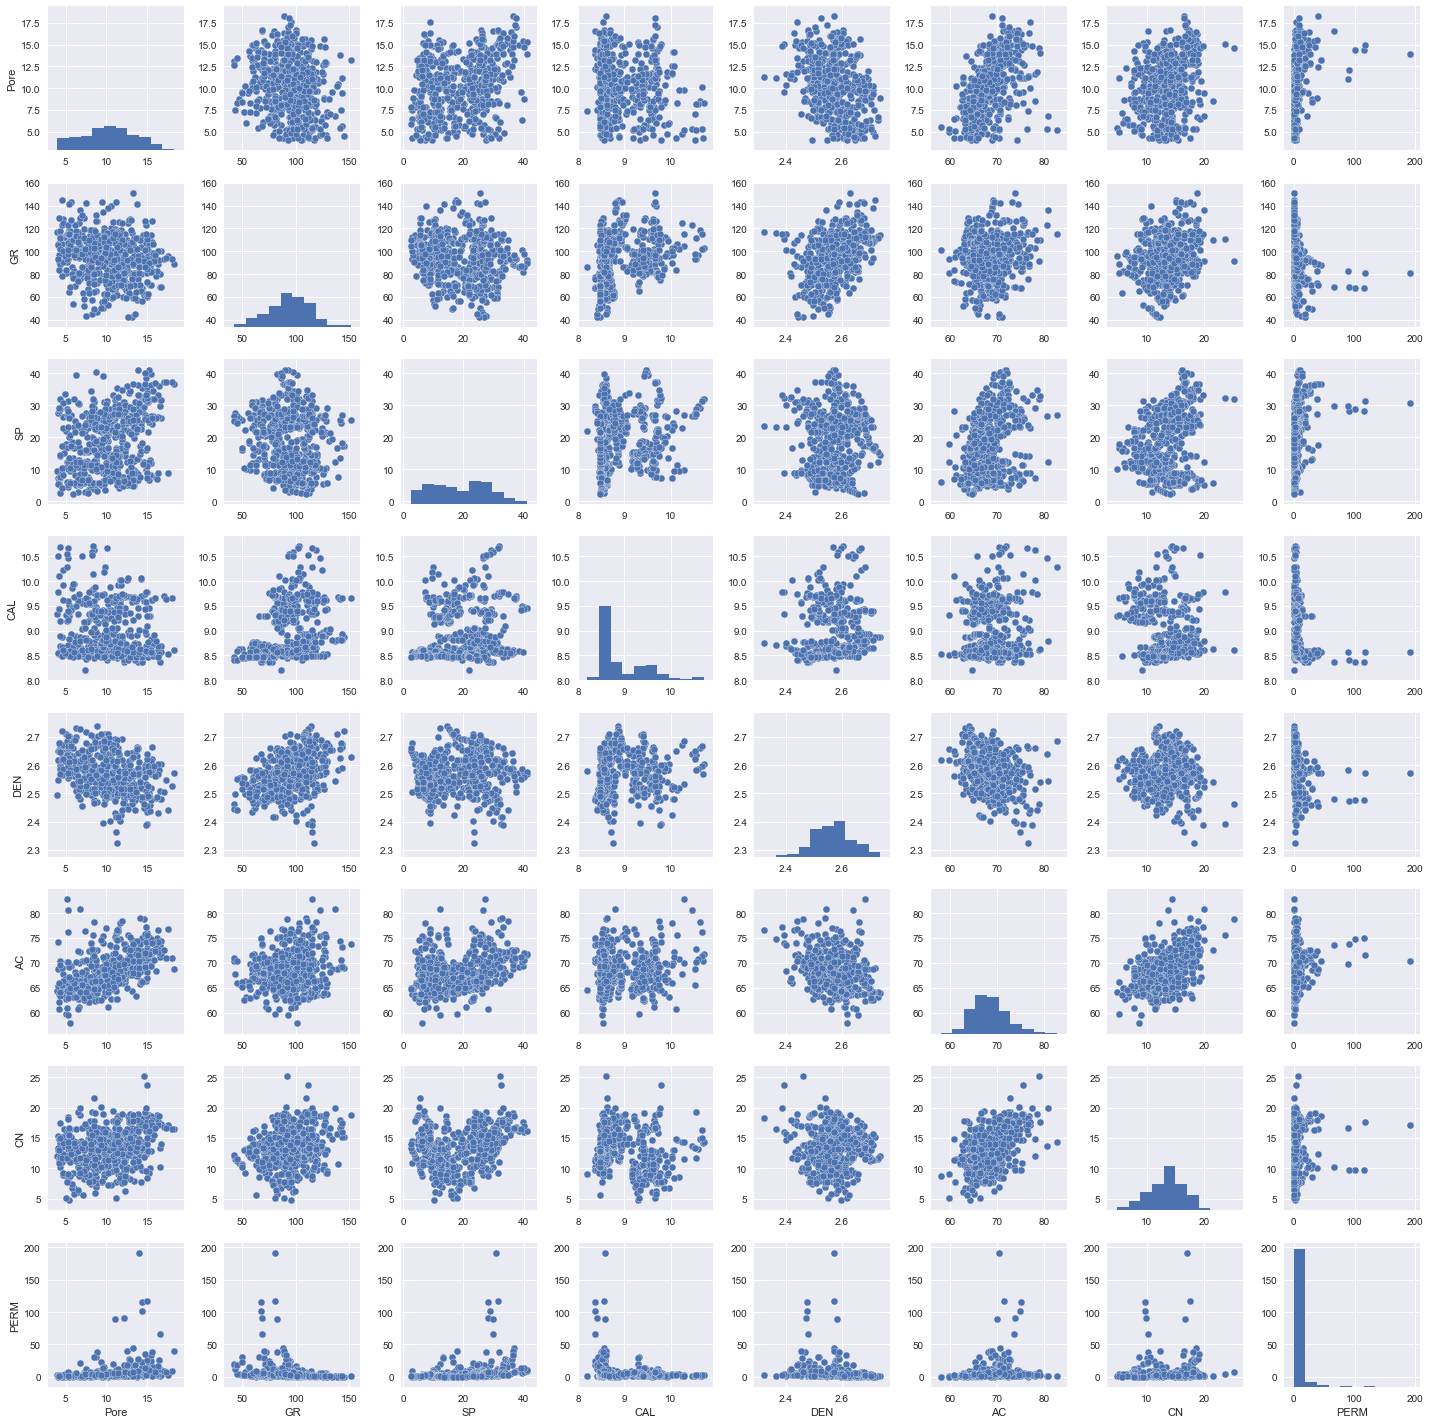

In [8]:
sns.set()
cols = [ 'Pore', 'GR', 'SP', 'CAL','DEN', 'AC',
       'CN', 'PERM']
sns.pairplot(df_train[cols], size = 2.5)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 555
Data columns (total 17 columns):
Well          555 non-null object
Depth         555 non-null float64
Pore          555 non-null float64
GR            555 non-null float64
SP            555 non-null float64
CAL           555 non-null float64
K             429 non-null float64
TH            429 non-null float64
U             429 non-null float64
DEN           555 non-null float64
AC            555 non-null float64
CN            555 non-null float64
PERM          555 non-null float64
STA           555 non-null object
Lithcore      397 non-null float64
Lithdebris    553 non-null float64
Faces         288 non-null float64
dtypes: float64(15), object(2)
memory usage: 98.0+ KB


Text(0.5,1,'测井响应相关性热度图')

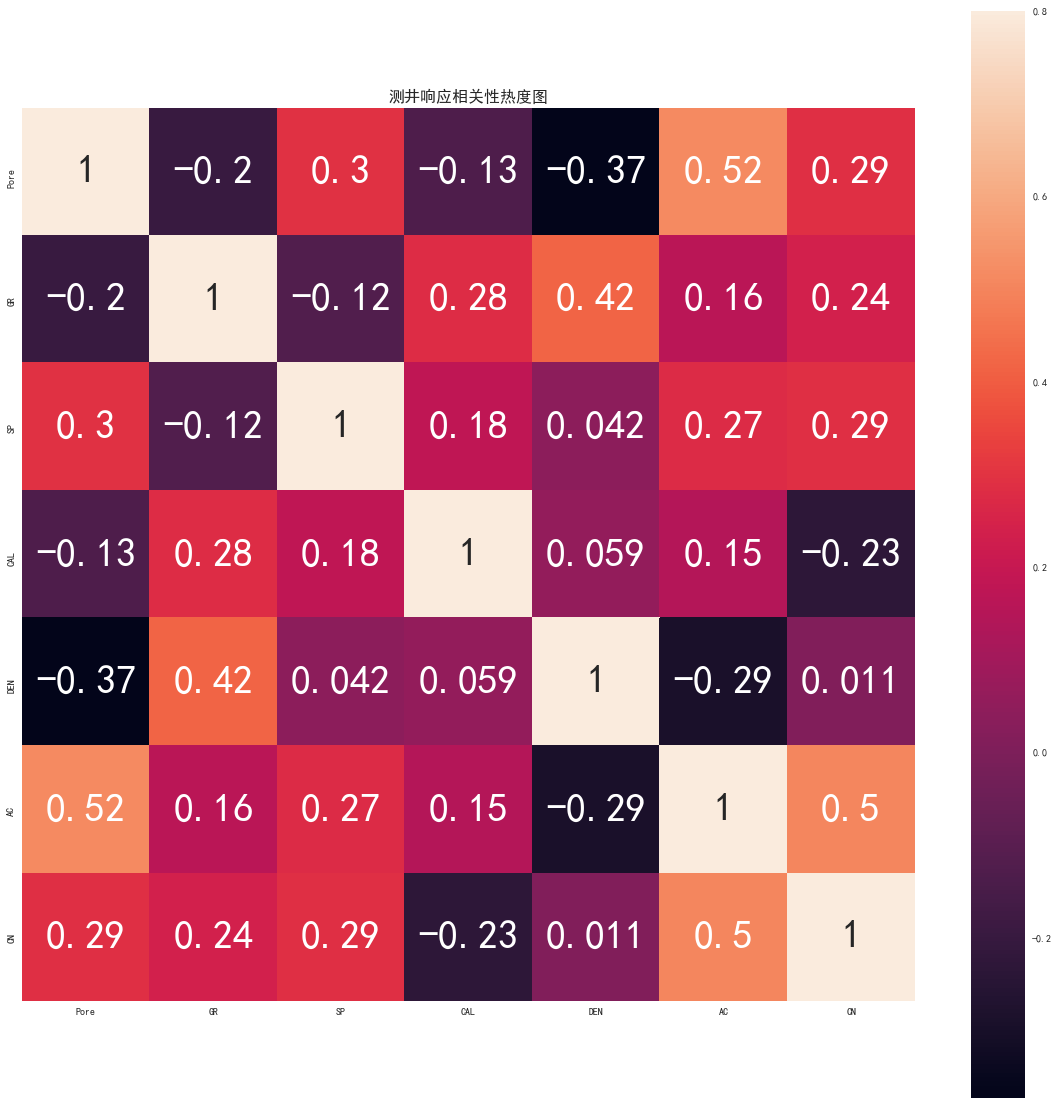

In [10]:
df_train=df_train.drop(['STA','Well','Lithcore','Lithdebris','Depth','PERM','U','TH','K','Faces'],axis=1)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True,annot_kws={'size': 40});
#6）sns.heatmap绘制相关性热度图，
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.title(u"测井响应相关性热度图",fontsize=16)


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 555
Data columns (total 7 columns):
Pore    555 non-null float64
GR      555 non-null float64
SP      555 non-null float64
CAL     555 non-null float64
DEN     555 non-null float64
AC      555 non-null float64
CN      555 non-null float64
dtypes: float64(7)
memory usage: 54.7 KB


In [12]:
#A=df_train[[ 'U','DEN', 'AC', 'CN']]
#A=df_train[[ 'GR','CAL','U', 'TH','K','DEN', 'AC', 'CN']]
A=df_train.drop(['Pore','CAL'],axis=1)
B=df_train[['Pore']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(A)
scaler2 = StandardScaler().fit(B)


In [13]:
print(scaler.mean_,scaler.var_)

print(scaler2.mean_,scaler2.var_)

[ 93.80376577  18.94991351   2.56863063  68.37798559  13.46066667] [  3.74401361e+02   8.70799920e+01   4.41744014e-03   1.32425004e+01
   9.59631229e+00]
[ 10.29963784] [ 10.15727785]


In [14]:
AA=scaler.transform(A)
BB=scaler2.transform(B)

In [15]:

#df_cal['PORE']=scale(df_cal['PORE'])

#df_cal['DEN']=scale(df_cal['DEN'])
#df_cal['AC']=scale(df_cal['AC'])
#df_cal['CN']=scale(df_cal['CN'])

In [16]:
#df_cal['PORE']

In [17]:
#df_cal

#df_cal=df_cal[df_cal['K'].isnull().values==False]


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
X=AA
y=BB
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

the r2_score is 0.538274103726 	mean_absolute_error is 0.520554099288 	 the mean_squared_error is 0.458153865052


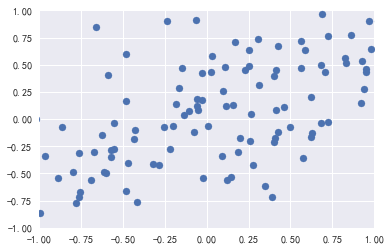

0.60574222737


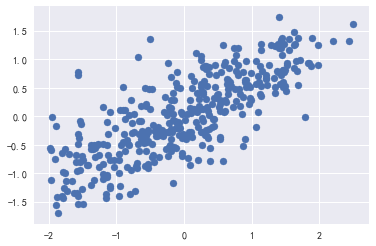

In [19]:
clf_KNN=KNeighborsRegressor()
clf_KNN.fit(X_train,y_train)
predicts_knn=clf_KNN.predict(X_test)
predicts_knnn=clf_KNN.predict(X_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cross_val_score(clf_KNN,X,y,cv=5,scoring='r2')
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_knn),mean_absolute_error(y_test,predicts_knn),mean_squared_error(y_test,predicts_knn)))
plt.scatter(y_test,predicts_knn)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_knnn))

plt.scatter(y_train,predicts_knnn)
plt.show()


the r2_score is 0.435632246619 	mean_absolute_error is 0.627692342477 	 the mean_squared_error is 0.560001658146


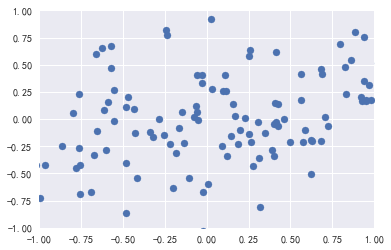

0.356109358691


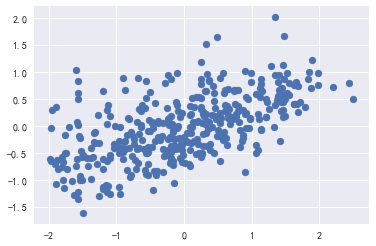

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cross_val_score(lr,X,y,cv=5)
lr.fit(X_train,y_train)
predicts_lr=lr.predict(X_test)
predicts_lrr=lr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_lr),mean_absolute_error(y_test,predicts_lr),mean_squared_error(y_test,predicts_lr)))
plt.scatter(y_test,predicts_lr)

axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_lrr))
plt.scatter(y_train,predicts_lrr)
plt.show()


[ 0.26775314  0.40820062  0.48424731  0.04945285 -0.14929637]
the r2_score is 0.582797831209 	mean_absolute_error is 0.506088115211 	 the mean_squared_error is 0.413974584666


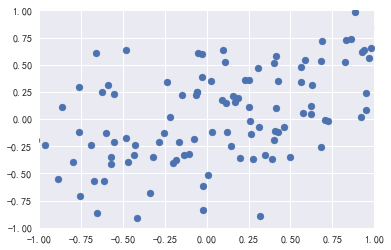

0.927881149662


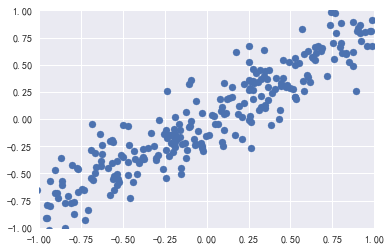

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr=RandomForestRegressor(n_estimators=1500)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
predicts_rfrr=rfr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))
plt.scatter(y_test,predicts_rfr)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_rfrr))
plt.scatter(y_train,predicts_rfrr)
axis([-1,1,-1,1])
plt.show()

[ 0.38372177  0.38451997  0.4668122   0.07266402  0.12646946]
the r2_score is 0.494446145216 	mean_absolute_error is 0.596438864355 	 the mean_squared_error is 0.501642759114


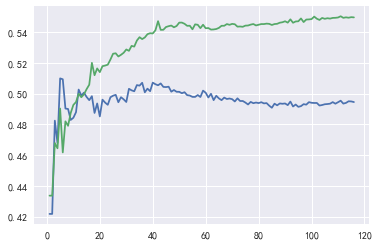

0.54948036568


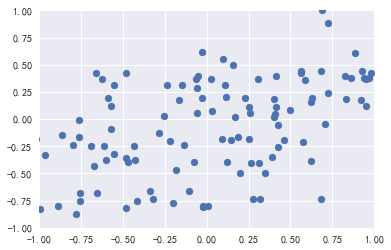

In [22]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=1500,random_state=5,learning_rate=0.1)
print(cross_val_score(abr,X,y,cv=5))
abr.fit(X_train,y_train)
predicts_abr=abr.predict(X_test)
predicts_abrr=abr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_abr),mean_absolute_error(y_test,predicts_abr),mean_squared_error(y_test,predicts_abr)))
plt.plot(range(1,117),[r2_score for r2_score in abr.staged_score(X_test,y_test)])
plt.plot(range(1,117),[r2_score for r2_score in abr.staged_score(X_train,y_train)])
plt.show()
print(r2_score(y_train,predicts_abrr))
plt.scatter(y_test,predicts_abr)
axis([-1,1,-1,1])

plt.show()

In [23]:
A

,GR,SP,DEN,AC,CN
0,96.071,23.352,2.603,63.198,6.763
1,96.569,24.499,2.480,69.971,13.070
2,103.800,23.631,2.480,72.126,13.014
3,89.930,22.209,2.528,69.543,10.235
4,86.517,18.232,2.600,63.994,6.826
5,110.447,20.473,2.588,68.262,9.142
6,98.842,23.327,2.542,69.863,11.072
7,112.850,26.761,2.488,70.051,12.175
8,78.300,31.833,2.479,68.974,10.988
9,75.102,31.357,2.476,69.199,9.311


In [24]:
df_log = pd.read_csv('C:/Users/Administrator/Desktop/picked_cal2.csv')
df_log.columns

Index(['Well', 'Depth', 'Pore', 'GR', 'SP', 'CAL', 'K', 'TH', 'U', 'DEN', 'AC',
       'CN', 'PERM', 'STA', 'Lithcore', 'Lithdebris', 'Faces'],
      dtype='object')

In [25]:
X_call=df_log[['GR','SP','DEN','AC','CN']]

In [26]:
X_call


,GR,SP,DEN,AC,CN
0,96.071,23.352,2.603,63.198,6.763
1,96.569,24.499,2.480,69.971,13.070
2,103.800,23.631,2.480,72.126,13.014
3,89.930,22.209,2.528,69.543,10.235
4,86.517,18.232,2.600,63.994,6.826
5,110.447,20.473,2.588,68.262,9.142
6,98.842,23.327,2.542,69.863,11.072
7,112.850,26.761,2.488,70.051,12.175
8,78.300,31.833,2.479,68.974,10.988
9,75.102,31.357,2.476,69.199,9.311


In [27]:
X_calll=scaler.transform(X_call)

In [28]:
X_calll

array([[ 0.11717304,  0.47173639,  0.51711392, -1.42345438, -2.16207793],
       [ 0.1429102 ,  0.59465121, -1.33351683,  0.43775862, -0.12611135],
       [ 0.51661584,  0.50163459, -1.33351683,  1.02995027, -0.14418874],
       ..., 
       [-0.18541949,  0.45598358,  2.02169177, -1.5954785 , -0.13966939],
       [ 0.02812659,  0.46198465,  2.12701221, -1.60949324,  0.12568093],
       [ 0.3754749 ,  0.4530902 ,  2.02169177, -1.47264339,  0.27707912]])

In [29]:
predicts_abr=lr.predict(X_calll)
predicts_rfr=rfr.predict(X_calll)

In [30]:
origin_abr = scaler2.inverse_transform(predicts_abr) 
origin_rfr = scaler2.inverse_transform(predicts_rfr) 

In [32]:
print(origin_abr)
print(origin_rfr)

[[  7.64901265]
 [ 11.68798469]
 [ 12.08548114]
 [ 10.82615095]
 [  7.94124533]
 [  9.09177939]
 [ 10.71931686]
 [ 11.16762882]
 [ 11.99877013]
 [ 11.92930163]
 [  8.69279414]
 [  8.36877991]
 [ 12.62348755]
 [ 12.36904996]
 [  9.69597102]
 [ 11.23018612]
 [ 12.63663047]
 [  7.24721301]
 [  6.8237959 ]
 [  8.95657587]
 [ 10.96151619]
 [ 10.19343615]
 [  8.01932484]
 [  9.72337125]
 [ 11.57723588]
 [ 11.55417784]
 [ 10.32793782]
 [  7.35279464]
 [ 10.200075  ]
 [ 11.70107364]
 [ 10.84542278]
 [ 12.76257418]
 [ 10.30740205]
 [  7.07142155]
 [ 10.667139  ]
 [ 11.66131802]
 [ 10.95784866]
 [ 10.84499579]
 [  8.96821378]
 [  8.3360185 ]
 [  8.62266835]
 [ 13.38480153]
 [ 13.05333899]
 [ 12.22714806]
 [ 11.54841296]
 [  8.57172981]
 [  8.98394114]
 [  8.99713274]
 [  8.75131385]
 [  8.7496705 ]
 [  9.37506244]
 [  9.12895163]
 [ 10.67525823]
 [ 10.74039475]
 [  9.97124333]
 [  7.89839196]
 [  7.65992602]
 [  6.6646273 ]
 [  8.41000149]
 [  9.60265135]
 [ 10.41681845]
 [  9.4727429 ]
 [  9.74

In [37]:
submission = pd.read_csv("C:/Users/Administrator/Desktop/picked_cal2.csv")

submission.iloc[:,3] = origin_abr
submission.iloc[:,4] = origin_rfr
submission.to_csv("picked_cal2result.csv", index=False)